In [165]:
import pandas as pd

In [166]:
import matplotlib.pyplot as plt

In [167]:
df=pd.read_csv('RSCCASN.csv',parse_dates=True,index_col="DATE")

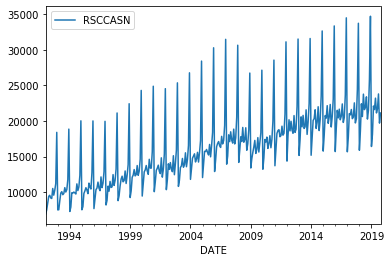

In [168]:
df.plot()

In [169]:
df.rename(columns={'RSCCASN':'SALES'},inplace=True)

In [170]:
df.head()

,SALES
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [171]:
len(df)

334

In [172]:
test_perc=18

In [173]:
test_ind=len(df)-test_perc

In [174]:
train=df.iloc[:test_ind]

In [175]:
test=df.iloc[test_ind:]

In [176]:
train

,SALES
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [177]:
test

,SALES
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [178]:
from sklearn.preprocessing import MinMaxScaler

In [179]:
scaler=MinMaxScaler()

In [180]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [181]:
scaled_train=scaler.transform(train)

In [182]:
scaled_test=scaler.transform(test)

In [183]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [184]:
scaled_test

array([[0.61087714],
       [0.53191258],
       [0.54389341],
       [0.59697212],
       [0.4836625 ],
       [0.52770113],
       [0.68592071],
       [1.00813244],
       [0.34388615],
       [0.40647691],
       [0.55021057],
       [0.53220302],
       [0.59040081],
       [0.51499419],
       [0.53645077],
       [0.61185739],
       [0.46314987],
       [0.51463114]])

In [185]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [186]:
length=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [187]:
X,y=generator[0]

In [188]:
generator.data.shape

(316, 1)

In [189]:
y

array([[0.02047633]])

In [190]:
val_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [191]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [192]:
n_features=1
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features),return_sequences=True))
model.add(LSTM(100,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))

In [193]:
model.compile(optimizer='adam',loss='mse')

In [194]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 12, 100)           40800     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 134,257
Trainable params: 134,257
Non-trainable params: 0
_________________________________________________________________


In [195]:
from keras.callbacks import EarlyStopping

In [196]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5)

In [197]:
model.fit_generator(generator,validation_data=(val_generator),epochs=20,callbacks=[early_stopping])

Epoch 1/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0254 - val_loss: 0.0068
Epoch 2/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0204 - val_loss: 1.3678e-04
Epoch 3/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0174 - val_loss: 0.0016
Epoch 4/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0156 - val_loss: 2.3763e-04
Epoch 5/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0095 - val_loss: 1.0623e-05
Epoch 6/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 7/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0031 - val_loss: 0.0068
Epoch 8/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 9/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0025 - val_loss: 5.5431e-04
Epoch 10/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0017 - 

In [198]:
losses=pd.DataFrame(model.history.history)

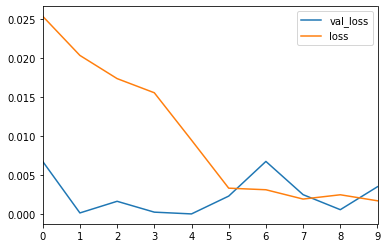

In [199]:
losses.plot()

In [200]:
import numpy as np

In [201]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [202]:
test_predictions

[array([0.55568993], dtype=float32),
 array([0.51665956], dtype=float32),
 array([0.5272598], dtype=float32),
 array([0.59437954], dtype=float32),
 array([0.50671726], dtype=float32),
 array([0.5326895], dtype=float32),
 array([0.68175244], dtype=float32),
 array([1.0251269], dtype=float32),
 array([0.38415825], dtype=float32),
 array([0.46535772], dtype=float32),
 array([0.58309305], dtype=float32),
 array([0.5279178], dtype=float32),
 array([0.5812279], dtype=float32),
 array([0.5490582], dtype=float32),
 array([0.56278646], dtype=float32),
 array([0.62456656], dtype=float32),
 array([0.5482978], dtype=float32),
 array([0.578539], dtype=float32)]

In [203]:
true_predictions=scaler.inverse_transform(test_predictions)

In [204]:
test['Predictions']=true_predictions

C:\Users\yousuf\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [205]:
test

,SALES,Predictions
DATE,,
2018-05-01,23764,22243.923457
2018-06-01,21589,21168.870861
2018-07-01,21919,21460.844666
2018-08-01,23381,23309.590167
2018-09-01,20260,20895.020338
2018-10-01,21473,21610.399912
2018-11-01,25831,25716.189299
2018-12-01,34706,35174.096272
2019-01-01,16410,17519.254939


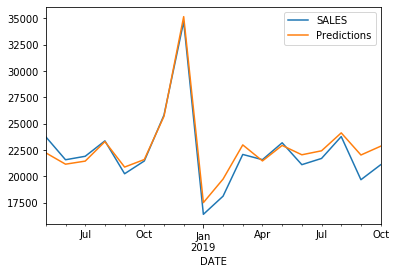

In [206]:
test.plot()

In [207]:
full_scaler=MinMaxScaler()

In [208]:
full_scaled=full_scaler.fit_transform(df)

In [209]:
len(full_scaled)

334

In [210]:
generator=TimeseriesGenerator(full_scaled,full_scaled,length=length,batch_size=1)

In [211]:
n_features=1
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features),return_sequences=True))
model.add(LSTM(100,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))

In [213]:
model.compile(optimizer='adam',loss='mse')

In [214]:
model.fit_generator(generator,epochs=20)

Epoch 1/20
322/322 [==============================] - 3s 9ms/step - loss: 0.0255
Epoch 2/20
322/322 [==============================] - 2s 6ms/step - loss: 0.0151
Epoch 3/20
322/322 [==============================] - 2s 6ms/step - loss: 0.0069
Epoch 4/20
322/322 [==============================] - 2s 6ms/step - loss: 0.0028
Epoch 5/20
322/322 [==============================] - 2s 6ms/step - loss: 0.0041
Epoch 6/20
322/322 [==============================] - 2s 6ms/step - loss: 0.0018
Epoch 7/20
322/322 [==============================] - 2s 6ms/step - loss: 0.0013
Epoch 8/20
322/322 [==============================] - 2s 7ms/step - loss: 0.0015
Epoch 9/20
322/322 [==============================] - 2s 6ms/step - loss: 0.0019
Epoch 10/20
322/322 [==============================] - 2s 7ms/step - loss: 0.0013
Epoch 11/20
322/322 [==============================] - 2s 6ms/step - loss: 0.0013
Epoch 12/20
322/322 [==============================] - 2s 6ms/step - loss: 0.0013
Epoch 13/20
322/322 [====

In [215]:
losses=pd.DataFrame(model.history.history)

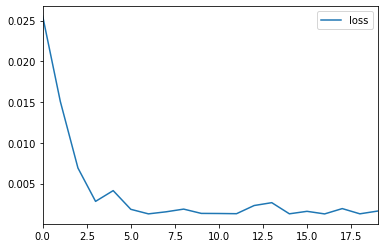

In [216]:
losses.plot()

In [217]:
df.head()

,SALES
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [218]:
import numpy as np

In [219]:
forecast=[]
periods=12
first_eval_batch=full_scaled[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [220]:
forecast

[array([0.69274664], dtype=float32),
 array([1.0103327], dtype=float32),
 array([0.3720392], dtype=float32),
 array([0.42312592], dtype=float32),
 array([0.55183095], dtype=float32),
 array([0.5341917], dtype=float32),
 array([0.59249467], dtype=float32),
 array([0.5178393], dtype=float32),
 array([0.53864324], dtype=float32),
 array([0.6146566], dtype=float32),
 array([0.4713801], dtype=float32),
 array([0.51675826], dtype=float32)]

In [221]:
forecast=scaler.inverse_transform(forecast)

In [222]:
forecast_index=pd.date_range(start='2019-11-01',periods=periods,freq="MS")

In [223]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [224]:
forecast_df=pd.DataFrame(forecast,index=forecast_index,columns=["Forecast"])

In [225]:
forecast_df

,Forecast
2019-11-01,26019.013432
2019-12-01,34766.603988
2020-01-01,17185.447694
2020-02-01,18592.580414
2020-03-01,22137.631615
2020-04-01,21651.776946
2020-05-01,23257.673096
2020-06-01,21201.366025
2020-07-01,21774.389428
2020-08-01,23868.102139


In [226]:
import matplotlib.pyplot as plt

(576, 609)

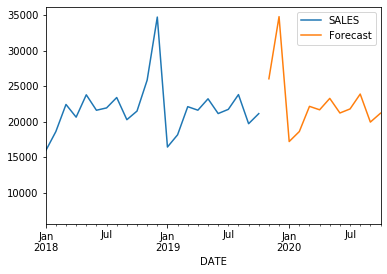

In [227]:
ax=df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-1-1','2020-10-1')

In [228]:
forecast_df

,Forecast
2019-11-01,26019.013432
2019-12-01,34766.603988
2020-01-01,17185.447694
2020-02-01,18592.580414
2020-03-01,22137.631615
2020-04-01,21651.776946
2020-05-01,23257.673096
2020-06-01,21201.366025
2020-07-01,21774.389428
2020-08-01,23868.102139


In [229]:
forecast=[]
first_eval_batch=scaled_sales[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))
periods=int(input("enter no of prediction"))
for i in range(periods):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

enter no of prediction3


In [230]:
forecast

[array([0.592363], dtype=float32),
 array([1.0023546], dtype=float32),
 array([0.18922238], dtype=float32)]

In [231]:
forecast=scaler.inverse_transform(forecast)

In [232]:
forecast_index=pd.date_range(start='2020-11-01',periods=periods,freq="MS")

In [233]:
forecast_index

DatetimeIndex(['2020-11-01', '2020-12-01', '2021-01-01'], dtype='datetime64[ns]', freq='MS')

In [234]:
forecast_df1=pd.DataFrame(forecast,index=forecast_index,columns=["Forecast"])

In [235]:
df2=pd.concat([forecast_df,forecast_df1])

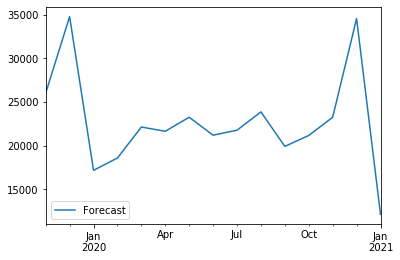

In [236]:
df2.plot()

In [237]:
scaler.inverse_transform(forecast_df)

array([[7.16674644e+08],
       [9.57618278e+08],
       [4.73362909e+08],
       [5.12120973e+08],
       [6.09765863e+08],
       [5.96383482e+08],
       [6.40616286e+08],
       [5.83977364e+08],
       [5.99760720e+08],
       [6.57429943e+08],
       [5.48730074e+08],
       [5.83157202e+08]])

In [238]:
import matplotlib.pyplot as plt

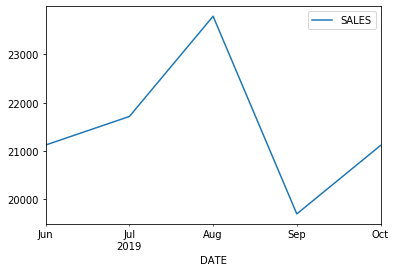

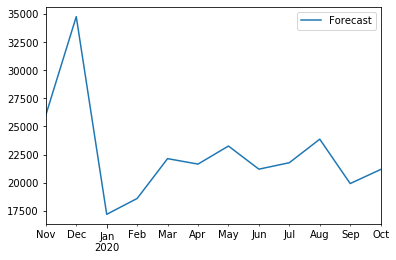

In [239]:
ax=df.tail().plot()
forecast_df.plot()

In [3]:
import joblib
model.save('sales.h5')
joblib.dump(full_scaler,'scaler.pkl')

NameError: name 'model' is not defined

# Deployment

In [121]:
sample_json={"Forecast":[6938,7524,8475,9401,9558,9182,9103,10513,9573,10254,11187,18395]}
import joblib
import pandas as pd 

In [1]:
import numpy as np
def return_predictions(model,scaler,sample_json):
    sales=sample_json['Forecast']
    reshaped_sales=np.array(sales).reshape(12,1)
    scaled_sales=scaler.transform(reshaped_sales)
    forecast=[]
    periods=int(input('Enter no of month to predict'))
    first_eval_batch=scaled_sales[-12:]
    current_batch=first_eval_batch.reshape((1,12,1))

    for i in range(periods):
        current_pred=model.predict(current_batch)[0]

        forecast.append(current_pred)
        current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
        date=pd.date_range(start='2020-11-01',periods=periods,freq="MS").tolist()
    return scaler.inverse_transform(current_batch.tolist()[0][-periods:]).tolist().append(date)

In [2]:
from keras.models import load_model
scaler_model=joblib.load('scaler.pkl')
model=load_model('sales.h5')

Using TensorFlow backend.


NameError: name 'joblib' is not defined

In [ ]:
return_predictions(model,scaler_model,sample_json)

In [ ]:
df.head()

In [313]:
import json

In [ ]:
import datetime